In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('retail_sales_dataset.csv')

In [4]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [7]:
df.info()
#EDA to view columns , data-types ,Null Values, and number of enteries
#NO Null Values Found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [11]:
df = df.drop_duplicates()
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [12]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [13]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [14]:
df.mode().dropna()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-05-16,CUST001,Female,43.0,Clothing,4.0,50.0,50.0


In [16]:
#Ordering data by date so as to do Time Series Analysis
df = df.sort_values(by = "Date")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25
...,...,...,...,...,...,...,...,...,...
519,520,2023-12-29,CUST520,Female,49,Electronics,4,25,100
232,233,2023-12-29,CUST233,Female,51,Beauty,2,300,600
856,857,2023-12-31,CUST857,Male,60,Electronics,2,25,50
210,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#converting date to date-time format
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


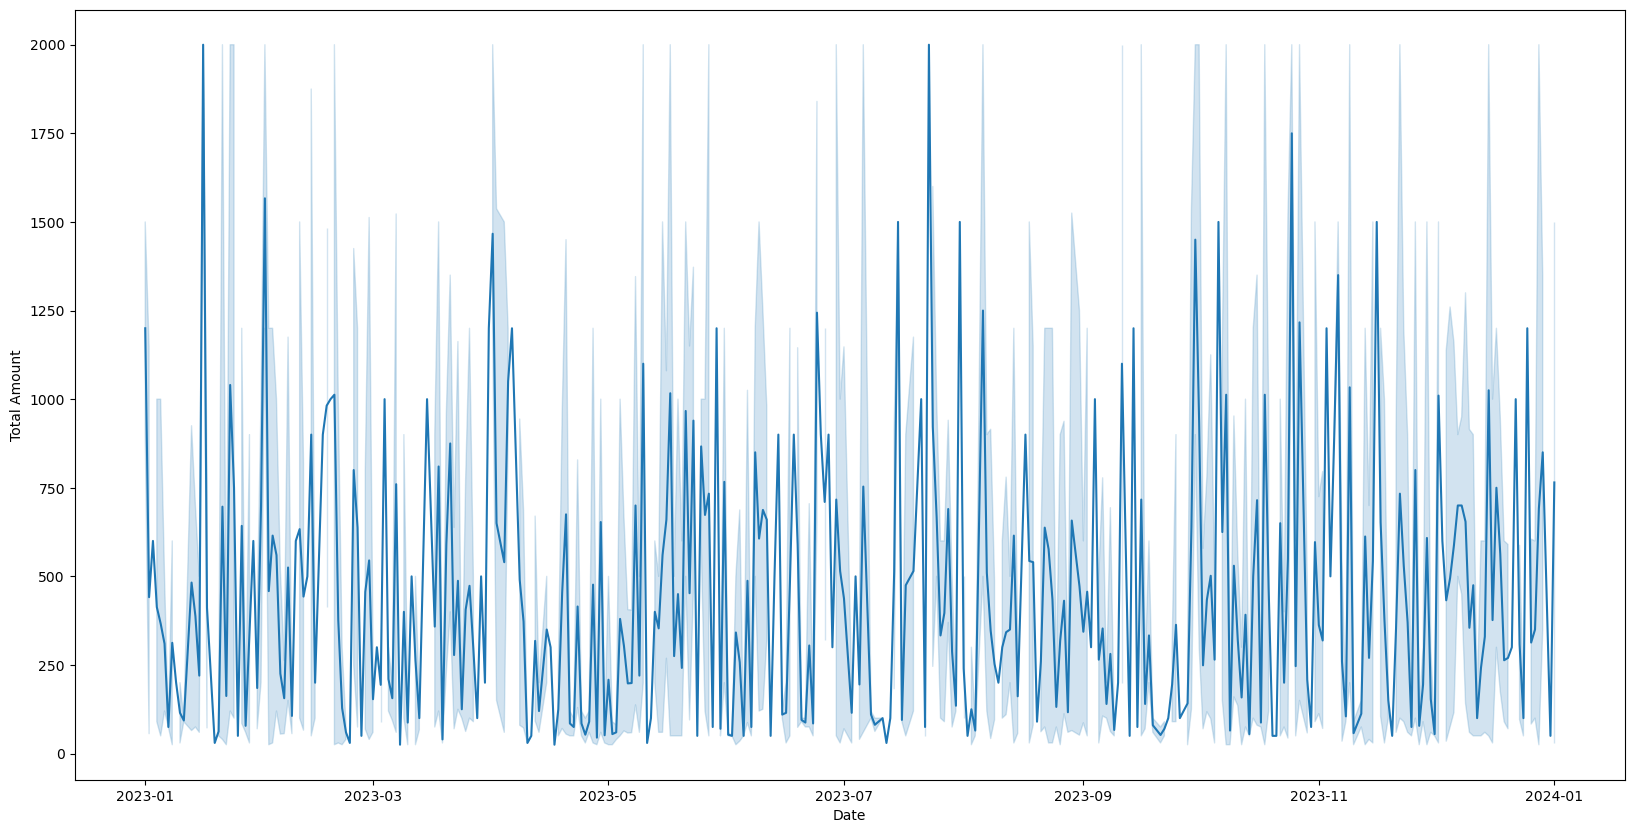

In [21]:
#Obtaining Plotof total amount of particular dates with seaborn
plt.figure(figsize=(20,10))
sns.lineplot(x="Date" ,y = "Total Amount" , data = df)
plt.show()

TIME SERIES ANALYSIS PER MONTH

In [29]:
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [30]:
Monthly_Sales = df.groupby(["Year" , "Month"],as_index=False)["Total Amount"].sum()
df['Monthly_Sales'] = Monthly_Sales['Total Amount']

In [33]:
df.drop(columns = "year")


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Monthly_Sales,Year
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500,1,NaN,2023
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,1,NaN,2023
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,1,NaN,2023
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90,1,NaN,2023
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25,1,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
519,520,2023-12-29,CUST520,Female,49,Electronics,4,25,100,12,NaN,2023
232,233,2023-12-29,CUST233,Female,51,Beauty,2,300,600,12,NaN,2023
856,857,2023-12-31,CUST857,Male,60,Electronics,2,25,50,12,NaN,2023
210,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500,1,NaN,2024


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


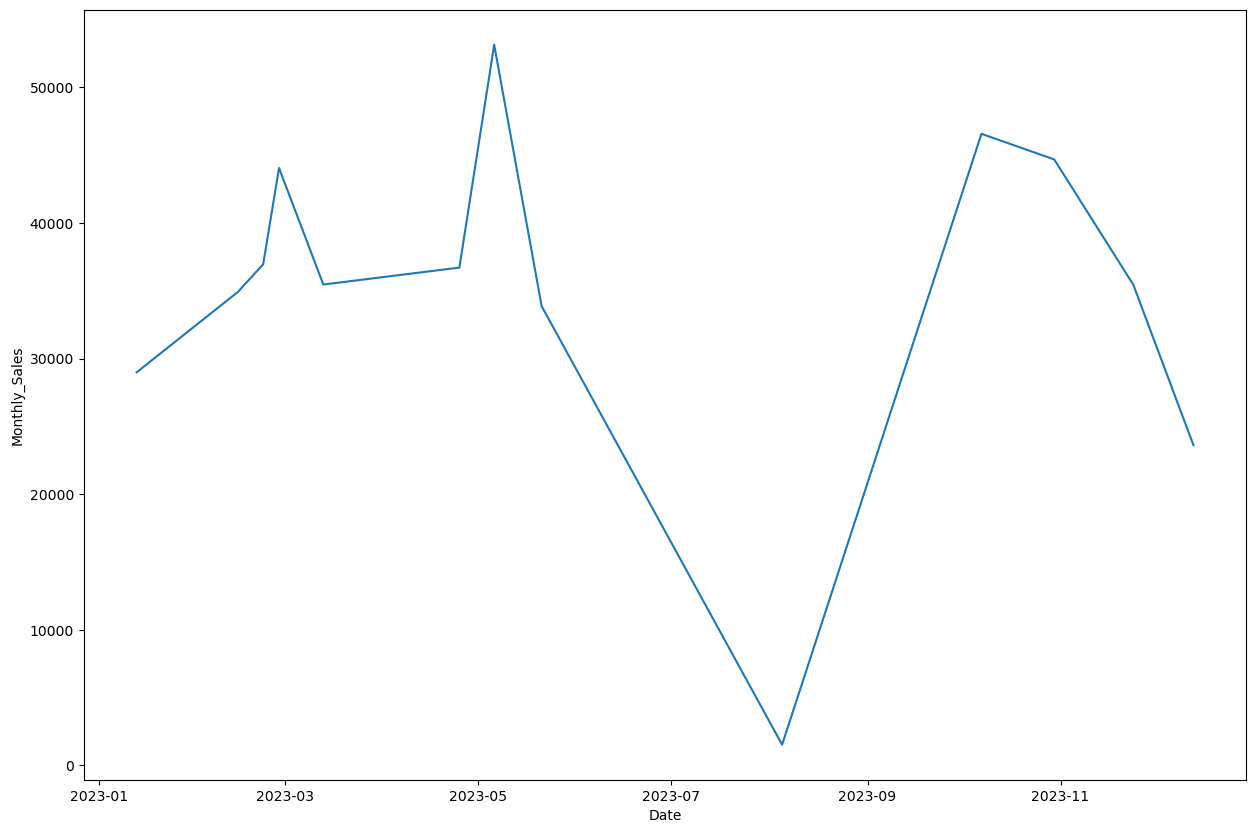

In [37]:
#A PLot of total monthly sales throughout the year
plt.figure(figsize=(15,10))
sns.lineplot(x = "Date" ,y ="Monthly_Sales", data = df)
plt.show()

In [41]:
#DEleting month, year ,monthly_sales coolumns for customer and product analyssis
df = df.drop(["year" ],axis = 1)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25


#ORder ANd PRoduct Analysis


In [42]:
#Creating Age Brackets
age_bins = [10,20,30,40,50,60]
age_labels = ['10-19','20-29','30-39','40-49','50+']
df["Age group"] = pd.cut(df["Age"],bins = age_bins , labels = age_labels , right = True)

In [43]:
#Calculating Total amount spend by each age group
Total_amount_by_age = df.groupby('Age group')['Total Amount'].sum()
print(Total_amount_by_age)

Age group
10-19     34730
20-29     98215
30-39     95950
40-49     93795
50+      100085
Name: Total Amount, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26532\3141166714.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Total_amount_by_age = df.groupby('Age group')['Total Amount'].sum()


In [45]:
#Grouping by Age Group and Product category and calculating the sum of spending
Grouped_data = df.groupby(['Age group', 'Product Category'])['Total Amount'].sum().reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26532\585961411.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Grouped_data = df.groupby(['Age group', 'Product Category'])['Total Amount'].sum().reset_index()


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


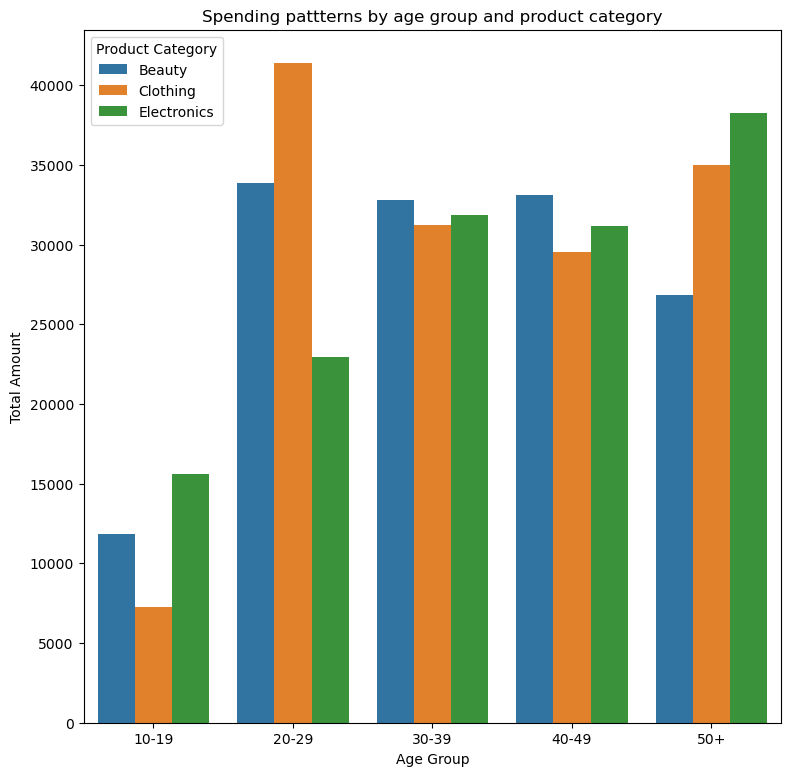

In [46]:
#Creating bar plots to visualize spending patterns by age group and product category
plt.figure(figsize=(9,9))
sns.barplot(x = 'Age group' , y ='Total Amount' , hue = 'Product Category' , data = Grouped_data)
plt.title("Spending pattterns by age group and product category")
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()

In [50]:
#calulating amount spend by gender
Gender_Total_spend = df.groupby('Gender')['Total Amount'].sum().reset_index()
print(Gender_Total_spend)

   Gender  Total Amount
0  Female        232840
1    Male        223160


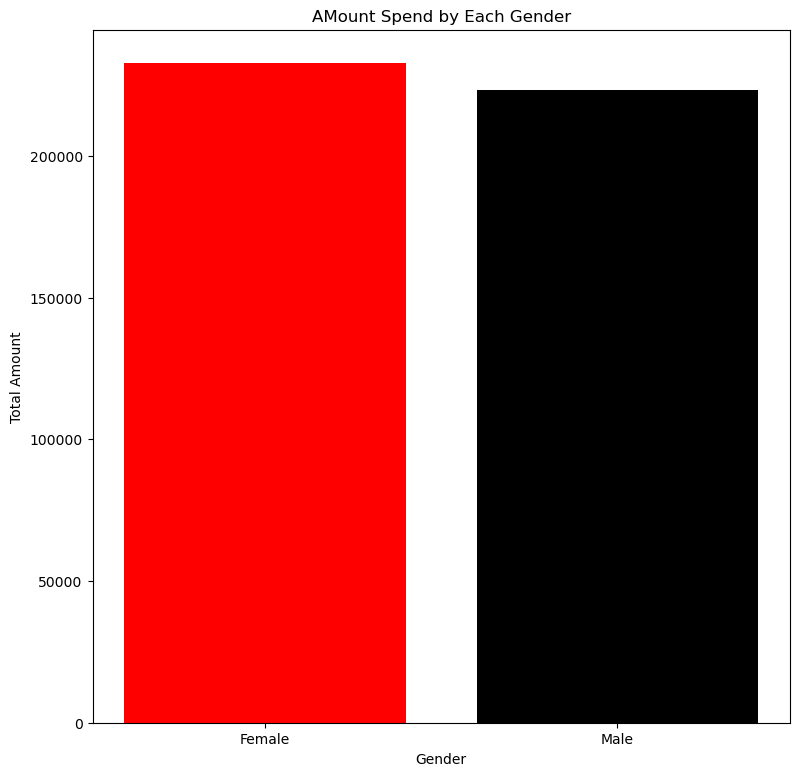

In [51]:
plt.figure(figsize=(9,9))
plt.bar(Gender_Total_spend['Gender'],Gender_Total_spend['Total Amount'],color = ['Red','Black'])
plt.title("AMount Spend by Each Gender")
plt.xlabel("Gender")
plt.ylabel("Total Amount")
plt.show()

In [52]:
#Calculating Product Preference By Gender

Gender_preference = df.groupby(['Gender','Product Category'])['Total Amount'].sum().reset_index()


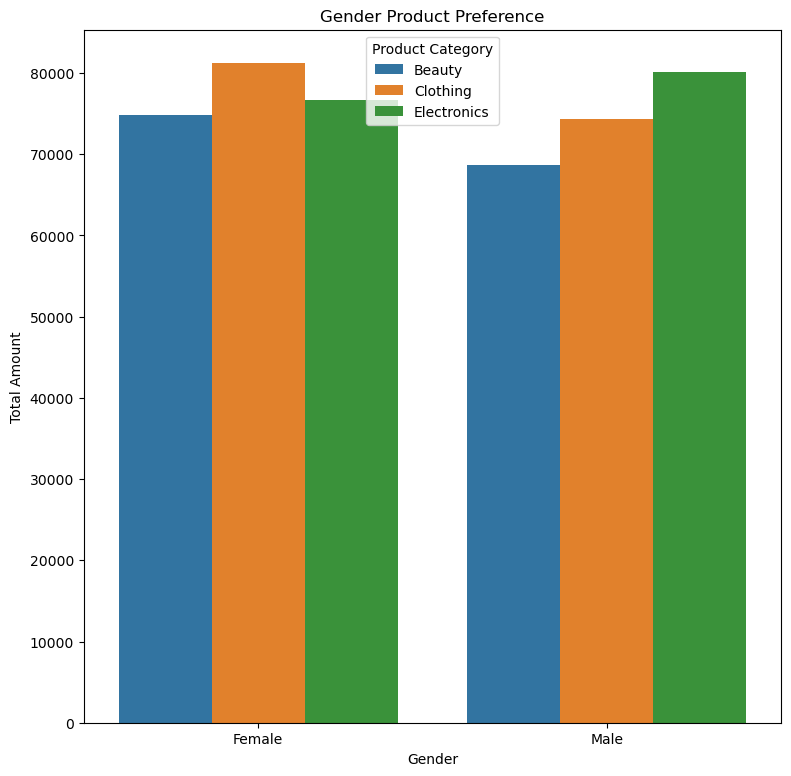

In [53]:
plt.figure(figsize=(9,9))
sns.barplot(x = 'Gender' , y ='Total Amount' , hue = 'Product Category' , data = Gender_preference)
plt.title("Gender Product Preference")
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

In [54]:
#Total revenue form each product
Total_revenue = df.groupby('Product Category')['Total Amount'].sum().reset_index()
print(Total_revenue)

  Product Category  Total Amount
0           Beauty        143515
1         Clothing        155580
2      Electronics        156905


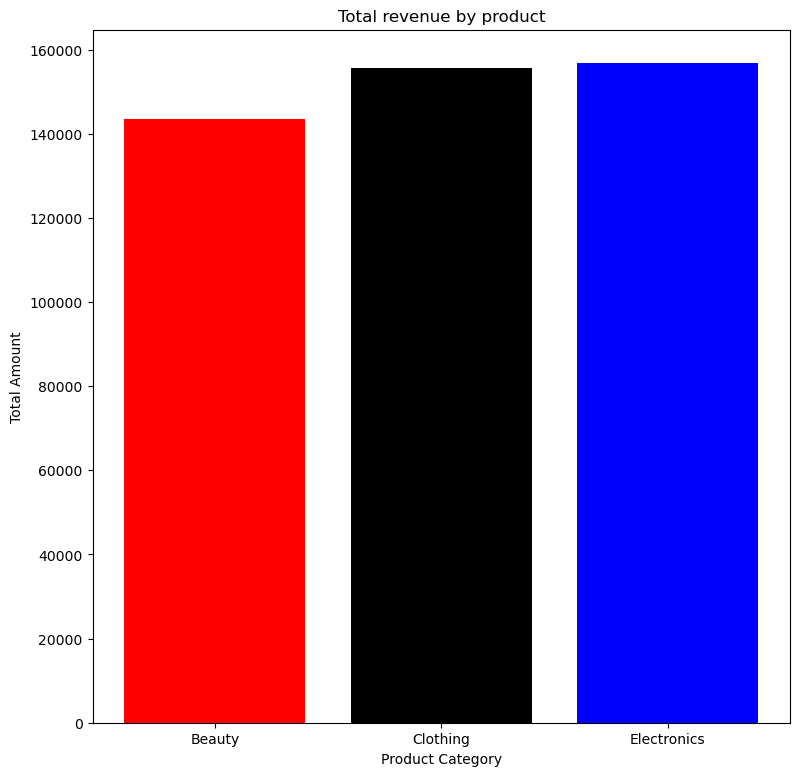

In [55]:
plt.figure(figsize=(9,9))
plt.bar(Total_revenue['Product Category'],Total_revenue['Total Amount'],color = ['Red','Black','Blue'])
plt.title("Total revenue by product")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.show()